<div style=" background-color: RGB(0,114,200);" >
<h2 style="margin: auto; padding: 30px 0; color:#fff; text-align: center"> Analyse et Consolidation des Données - Vins & Spiritueux
</h2>
</div>

**NOM:** CHRIST DAVID MONDJOT

**CLASSE:** M1 Intelligence Artificielle

## Données

### Données issues de l'ERP (gestion interne)

| Colonne        | Description                                                               |
|-------------------|-------------------------------------------------------------------------------|
| `product_id`       | Identifiant unique du produit dans le système ERP                            |
| `onsale_web`       | Indique si le produit est en vente sur le site web (`1` = oui, `0` = non)     |
| `price`            | Prix de vente du produit (affiché sur le site web)                           |
| `stock_quantity`   | Quantité de stock disponible pour le produit                                 |
| `stock_status`     | État du stock (`instock`, `outofstock`, etc.)                                |
| `purchase_price`   | Prix d’achat du produit (coût pour l’entreprise)                             |

---

### Données issues du site web 

| Colonne             | Description                                                             |
|------------------------|------------------------------------------------------------------------------|
| `sku`                   | Code produit unique utilisé sur le site web (identifiant de référence)      |
| `virtual`               | Produit virtuel (non physique), booléen (`1` ou `0`)                        |
| `downloadable`          | Produit téléchargeable (ex. : PDF, logiciel)                                |
| `rating_count`          | Nombre total d’avis/notes reçues par le produit                             |
| `average_rating`        | Note moyenne attribuée au produit (généralement sur 5)                      |
| `total_sales`           | Nombre total d’unités vendues                                               |
| `tax_status`            | Statut fiscal du produit (`taxable`, `none`, etc.)                          |
| `tax_class`             | Classe de taxe applicable (si renseignée)                                   |
| `post_author`           | ID de l’auteur (utilisateur qui a créé/modifié le produit)                  |
| `post_date`             | Date de création de la fiche produit                                        |
| `post_date_gmt`         | Date de création (heure GMT)                                                |
| `post_content`          | Description longue du produit                                               |
| `product_type`          | Type de produit (`simple`, `variable`, etc.)                                |
| `post_title`            | Titre du produit                                                            |
| `post_excerpt`          | Description courte (extrait)                                                |
| `post_status`           | Statut de publication (`publish`, `draft`, etc.)                            |
| `comment_status`        | Autorisation ou non des commentaires (`open`, `closed`)                     |
| `ping_status`           | Notifications externes (peu utilisé pour les produits)                      |
| `post_password`         | Mot de passe d’accès (rarement utilisé)                                     |
| `post_name`             | Slug du produit (nom SEO-friendly utilisé dans l’URL)                       |
| `post_modified`         | Date de dernière modification                                               |
| `post_modified_gmt`     | Idem, en heure GMT                                                          |
| `post_content_filtered` | Contenu nettoyé (souvent vide ou non utilisé)                               |
| `post_parent`           | ID du parent (utilisé pour les produits enfants ou groupés)                 |
| `guid`                  | Lien unique généré automatiquement par WordPress                            |
| `menu_order`            | Ordre d’affichage du produit dans les menus                                 |
| `post_type`             | Type d’objet (`product`, `page`, etc.)                                      |
| `post_mime_type`        | Type MIME du fichier joint (souvent vide)                                   |
| `comment_count`         | Nombre de commentaires ou d’avis laissés                                    |

---

### Données de liaison entre ERP et site web

| Colonne     | Description                                                                  |
|----------------|----------------------------------------------------------------------------------|
| `id_web`        | Identifiant du produit dans la base web (souvent équivalent à `sku`)            |
| `product_id`    | Identifiant du produit dans la base ERP (utilisé pour la correspondance interne) |


## création de fonctions pour identier et afficher les outliers

In [7]:
def detection_des_outliers(df , col ) :
    
    Q1 = np.percentile(df[col],25 )

    Q3 = np.percentile(df[col],75)

    IQR = Q3 - Q1                                               

    BI = Q1 - 1.5 * IQR
    BS = Q3 + 1.5 * IQR

    les_outliers = df[ (df[col] < BI ) | ( df[col] > BS ) ]

    print(f" dans la colonne {col} nous avons {len(les_outliers)} outliers" )

    fig = px.box(df , y = col , title=f" Boxplot de {col} avec  les outliers " )
    fig.update_layout(height = 500 , width = 600)
    fig.show()

    return les_outliers


def Affichage_des_outliers(df, colonne):
    q1 = df[colonne].quantile(0.25)
    q3 = df[colonne].quantile(0.75)
    iqr = q3 - q1
    borne_inf = q1 - 1.5 * iqr
    borne_sup = q3 + 1.5 * iqr
    return (df[colonne] < borne_inf) | (df[colonne] > borne_sup)

<div style="background-color: RGB(0,114,200);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); "> Importation des librairies</h3>
</div>

In [13]:
import pandas as pd
import numpy as np
import plotly.express as px
from scipy.stats import zscore

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); "> Chargement des fichiers</h3>
</div>

In [15]:
erp = pd.read_csv("C:/Users/lklk/OneDrive/Documents/cours MASTER/DATA SCIENCE/examen/DataSet/erp.csv")
web = pd.read_csv("C:/Users/lklk/OneDrive/Documents/cours MASTER/DATA SCIENCE/examen/DataSet/WEB.csv")
liaison = pd.read_csv("C:/Users/lklk/OneDrive/Documents/cours MASTER/DATA SCIENCE/examen/DataSet/liaison.csv")

<div style="background-color: RGB(0,114,200);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">Phase 1 : Consolidation des données.</h3>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">Analyse de la table ERP.</h3>
</div>

## Verifiaction des dimensions

In [22]:
ligne,colonne = erp.shape

print(f" la table ERP contient {ligne} ligne(s) et {colonne} colonne(s) ")

 la table ERP contient 825 ligne(s) et 6 colonne(s) 


## Vérifiaction des valeurs nulles 

In [25]:
erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
purchase_price    0
dtype: int64

On constate aisement que la table ERP ne dispose d'aucune valeur nulle ou manquante sur l'ensemble de ses colonnes

## Verification des doublons

In [30]:
doublon_erp = erp.duplicated().sum()
print(f" le table contient {doublon_erp} doublon(s) ")

 le table contient 0 doublon(s) 


In [32]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   purchase_price  825 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 38.8+ KB


On peut constater que la table ERP  dispose d'un typage normal pour chacune de ses colonnes

In [35]:
erp

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77
...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,23.48
821,7204,0,45.0,9,instock,24.18
822,7247,1,54.8,6,instock,27.18
823,7329,0,26.5,14,instock,13.42


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">Analyse de la table WEB.</h3>
</div>

## Vérifiaction des dimensions

In [40]:
ligne_W ,colonne_W = web.shape
print(f" la table WEB contient {ligne_W} ligne(s) et {colonne_W} colone(s) ")

 la table WEB contient 1513 ligne(s) et 29 colone(s) 


In [42]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sku                    1428 non-null   object 
 1   virtual                1513 non-null   int64  
 2   downloadable           1513 non-null   int64  
 3   rating_count           1513 non-null   int64  
 4   average_rating         1430 non-null   float64
 5   total_sales            1430 non-null   float64
 6   tax_status             716 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            1430 non-null   float64
 9   post_date              1430 non-null   object 
 10  post_date_gmt          1430 non-null   object 
 11  post_content           0 non-null      float64
 12  product_type           1429 non-null   object 
 13  post_title             1430 non-null   object 
 14  post_excerpt           716 non-null    object 
 15  post

## Vérification des doublons

In [45]:
doublon_web = web.duplicated().sum()
print(f" le table contient {doublon_web} doublon(s) ")

 le table contient 82 doublon(s) 


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 10px; color: rgb(196, 25, 65); "> Anomalie détectée
</div>

On contate la présence de 82 doublons dans la table web

## Verifiaction des valeurs nulles

In [50]:
web.isnull().sum()

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
product_type               84
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 10px; color: rgb(196, 25, 65); "> Anomalie détectée 
</div>

 Apres une verification des valeurs nulles de la table web le resultat est hilarant,plusieurs valeurs manquantes à l'appel. la colonne sku qui represente en quelque sorte les id des produits sur le web contient 85 valeurs manquantes , des colonne comme : tax_class ,post_content ,post_password , post_content_filtered ,contiennent 1513 valeurs manquantes sur 1513 lignes .Grosso modo la table web contient plusieurs valeurs manquantes.

In [54]:
total_valeur_manquante = (web.isnull().sum().sum() / web.size )*100
print(f"la table contient {total_valeur_manquante:.2f} % de valeurs manquantes ")

la table contient 22.85 % de valeurs manquantes 



<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 10px; color: rgb(196, 25, 65); "> Une copie de la table s'impose pour un traitement pousser
</div>

In [195]:
web_copy = web.copy()

In [197]:
LWC,CWC = web_copy.shape
print(f"la table contient {LWC} ligne(s) et {CWC} colonnes(s) avant suppression des doublons")

la table contient 1513 ligne(s) et 29 colonnes(s) avant suppression des doublons


- Suppressiondes doublons

In [200]:
web_copy.drop_duplicates(inplace = True)

In [202]:
LWC,CWC = web_copy.shape
print(f"la table contient {LWC} ligne(s) et {CWC} colonnes(s) après suppression des doublons")

la table contient 1431 ligne(s) et 29 colonnes(s) après suppression des doublons


- Vérification des valeurs nulles

In [205]:
web_copy.isnull().sum()

sku                         3
virtual                     0
downloadable                0
rating_count                0
average_rating              1
total_sales                 1
tax_status                715
tax_class                1431
post_author                 1
post_date                   1
post_date_gmt               1
post_content             1431
product_type                2
post_title                  1
post_excerpt              715
post_status                 1
comment_status              1
ping_status                 1
post_password            1431
post_name                   1
post_modified               1
post_modified_gmt           1
post_content_filtered    1431
post_parent                 1
guid                        1
menu_order                  1
post_type                   1
post_mime_type            717
comment_count               1
dtype: int64

Apres suppression des doublons la table contient encore des valeurs nulles. Des colonnes comme  : tax_class , post_content , post_password , post_content_filtered ont la totalité des valeurs manquantes

Attardons nous un peu sur la colonne sku car c'est cette colonne qu'on veut matcher lors de la lison avec la table de liaison

In [210]:
web_copy[web_copy['sku'].isnull()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
8,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1084,NaN,0,0,0,0.0,-56.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1087,NaN,0,0,0,0.0,-17.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 10px; color: rgb(196, 25, 65); "> Anomalie détectée
</div>

On constate que, dans les trois lignes sans SKU, une ligne est totalement vide, tandis que les deux autres sont presque remplies mais manquent de SKU

In [214]:
web_copy['sku'].map(type).value_counts()

sku
<class 'str'>      1428
<class 'float'>       3
Name: count, dtype: int64

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 10px; color: rgb(196, 25, 65); "> Anomalie détectée
</div>

On constate que la conne sku n'est pas typé correctement elle contient des valeurs chaine de caractère et des valeurs float ce qui n'est pas bon 

- Tri par sku

In [219]:
web_copy.sort_values(by='sku')

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
668,10014,0,0,0,0.0,10.0,taxable,NaN,2.0,2019-04-04 15:45:23,...,darnleys-london-dry-gin-original,2020-08-26 15:55:02,2020-08-26 13:55:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1030,10014,0,0,0,0.0,10.0,NaN,NaN,2.0,2019-04-04 15:45:23,...,darnleys-london-dry-gin-original,2020-08-26 15:55:02,2020-08-26 13:55:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
887,10459,0,0,0,0.0,4.0,NaN,NaN,2.0,2018-04-13 15:58:19,...,alphonse-mellot-sancerre-rouge-generation-xix-...,2020-08-24 14:05:02,2020-08-24 12:05:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
748,10459,0,0,0,0.0,4.0,taxable,NaN,2.0,2018-04-13 15:58:19,...,alphonse-mellot-sancerre-rouge-generation-xix-...,2020-08-24 14:05:02,2020-08-24 12:05:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
802,10775,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-04-17 21:28:52,...,albert-mann-pinot-gris-vendanges-tardives-alte...,2018-12-22 10:30:02,2018-12-22 09:30:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,bon-cadeau-25-euros,0,0,0,0.0,7.0,NaN,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1387,bon-cadeau-25-euros,0,0,0,0.0,7.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
8,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1084,NaN,0,0,0,0.0,-56.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 10px; color: rgb(196, 25, 65); "> Anomalie détectée
</div>

On constate que des valeurs on des sku **'bon-cadeau-25-euros'** ce qui confirme un réel problème de typage dans la colonne sku

- Uniformisation des valeurs

In [225]:
web_copy['sku'] = web_copy['sku'].astype(str)

On uniformise tout pour avoir un seul type L'étape astype(str) 
garantit que toutes les entrées de la colonne sont traitées comme des chaînes de caractères, éliminant toute ambiguïté ou problème qui pourrait survenir si certaines valeurs étaient traitées comme des nombres et d'autres comme du texte.

In [228]:
web_copy.isnull().sum()

sku                         0
virtual                     0
downloadable                0
rating_count                0
average_rating              1
total_sales                 1
tax_status                715
tax_class                1431
post_author                 1
post_date                   1
post_date_gmt               1
post_content             1431
product_type                2
post_title                  1
post_excerpt              715
post_status                 1
comment_status              1
ping_status                 1
post_password            1431
post_name                   1
post_modified               1
post_modified_gmt           1
post_content_filtered    1431
post_parent                 1
guid                        1
menu_order                  1
post_type                   1
post_mime_type            717
comment_count               1
dtype: int64

- Suppression des colonnes complètement vides

In [232]:
colonne_s = ['tax_class' , 'post_content' , 'post_password' , 'post_content_filtered' ]

web_copy.drop( columns =  colonne_s , inplace = True)

In [234]:
web_copy.isnull().sum()

sku                    0
virtual                0
downloadable           0
rating_count           0
average_rating         1
total_sales            1
tax_status           715
post_author            1
post_date              1
post_date_gmt          1
product_type           2
post_title             1
post_excerpt         715
post_status            1
comment_status         1
ping_status            1
post_name              1
post_modified          1
post_modified_gmt      1
post_parent            1
guid                   1
menu_order             1
post_type              1
post_mime_type       717
comment_count          1
dtype: int64

In [237]:
LISSTE = web_copy.sort_values(by='sku',ascending = False)
LISSTE

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1084,nan,0,0,0,0.0,-56.0,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,...,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
8,nan,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1087,nan,0,0,0,0.0,-17.0,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,...,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1387,bon-cadeau-25-euros,0,0,0,0.0,7.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
842,bon-cadeau-25-euros,0,0,0,0.0,7.0,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,10775,0,0,0,0.0,6.0,NaN,2.0,2018-04-17 21:28:52,2018-04-17 19:28:52,...,closed,albert-mann-pinot-gris-vendanges-tardives-alte...,2018-12-22 10:30:02,2018-12-22 09:30:02,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
748,10459,0,0,0,0.0,4.0,taxable,2.0,2018-04-13 15:58:19,2018-04-13 13:58:19,...,closed,alphonse-mellot-sancerre-rouge-generation-xix-...,2020-08-24 14:05:02,2020-08-24 12:05:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
887,10459,0,0,0,0.0,4.0,NaN,2.0,2018-04-13 15:58:19,2018-04-13 13:58:19,...,closed,alphonse-mellot-sancerre-rouge-generation-xix-...,2020-08-24 14:05:02,2020-08-24 12:05:02,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
668,10014,0,0,0,0.0,10.0,taxable,2.0,2019-04-04 15:45:23,2019-04-04 13:45:23,...,closed,darnleys-london-dry-gin-original,2020-08-26 15:55:02,2020-08-26 13:55:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 10px; color: rgb(196, 25, 65); "> Anomalie détectée
</div>

Il semblerait aussi que chaque élément apparaitrait deux fois , une première fois en tant que produit et une deuxième fois avec une image surement pour le site web. Cela peut se confirmer via la colonne post_type qui a deux valeurs differentes pour un meme produit , une avec product et l'autre avec attachment suivi de la colonne post_mime_type ou est affiché image/jpeg .

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">Analyse de la table LIAISON.</h3>
</div>

In [243]:
ligne_L , colonne_L = liaison.shape

print(f" la table liaison contient {ligne_L} ligne(s) et {colonne_L} colonne(s) ")

 la table liaison contient 825 ligne(s) et 2 colonne(s) 


In [245]:
liaison.isnull().sum()

id_web        91
product_id     0
dtype: int64

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 10px; color: rgb(196, 25, 65); "> Anomalie détectée
</div>

Après verification, On constate la présence de valeurs manquantes et la majorité sinon l'unique absence provient de la colonne des id web qui fait réference aux données provenenant du web . La colonne product_id qui fait réference aux données provenant de ERP ne contient pas de valeurs manquantes .

In [249]:
V_manquante_L = ( liaison.isnull().sum().sum() / liaison.size )*100
print(f" La proportion de valeur manquante dans la table liaison est de {V_manquante_L:.1f} %" )

 La proportion de valeur manquante dans la table liaison est de 5.5 %


In [252]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  825 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


- Un constat est fait , la table ERP contient 825 lignes comme la table liaison, une eventuel jointure peut etre faite entre ERP et LIAISON surtout que l'absence de valeur dans la table liaison ne provient pas des product_id qui font référence à la table ERP

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">Stratégie de jointure des données.</h3>
</div>

### Jointure entre ERP & LIAISON

In [258]:
erp_liaison = erp.merge( liaison , on ='product_id' )

In [260]:
erp_liaison

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web
0,3847,1,24.2,16,instock,12.88,15298
1,3849,1,34.3,10,instock,17.54,15296
2,3850,1,20.8,0,outofstock,10.64,15300
3,4032,1,14.1,26,instock,6.92,19814
4,4039,1,46.0,3,outofstock,23.77,19815
...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,23.48,NaN
821,7204,0,45.0,9,instock,24.18,NaN
822,7247,1,54.8,6,instock,27.18,13127-1
823,7329,0,26.5,14,instock,13.42,14680-1


## Vérification des valeurs nulles 

In [263]:
erp_liaison.isnull().sum()

product_id         0
onsale_web         0
price              0
stock_quantity     0
stock_status       0
purchase_price     0
id_web            91
dtype: int64

## Jointure entre erp_liaison & WEB

In [267]:
erp_liaison_web = erp_liaison.dropna().merge(web.loc[web['post_type'] == 'product' ], left_on ='id_web' ,right_on ='sku' )

* **erp_liaison.dropna() :**
La méthode .dropna() est appliquée pour supprimer toutes les lignes de ce DataFrame qui contiennent au moins une valeur manquante (NaN). L'objectif est de garantir que seules les informations complètes et valides de l'ERP sont utilisées pour la suite de l'opération, ce qui est crucial pour la qualité de la jointure.

* **web.loc[web['post_type'] == 'product'] :**
Cette expression sélectionne uniquement les lignes du DataFrame web où la colonne post_type a spécifiquement la valeur 'product'. Ceci est essentiel pour s'assurer que nous fusionnons uniquement des entrées qui correspondent à des produits réels et vendables de notre site web, en excluant d'autres types de contenu (comme 'attachment').

* **.merge( ... , left_on='id_web', right_on='sku') :**
left_on='id_web' : Indique que la colonne id_web du DataFrame de gauche (le erp_liaison nettoyé) sera utilisée comme clé principale pour la jointure.

* **right_on='sku' :** Spécifie que la colonne sku du DataFrame de droite (le web filtré) sera la clé correspondante. Le sku (Stock Keeping Unit) est l'identifiant unique pour les produits dans la table web.

Cette méthode effectue une inner join. Cela signifie que le nouveau DataFrame erp_liaison_web sera créé en incluant uniquement les lignes pour lesquelles une correspondance exacte a été trouvée entre un id_web de l'ERP et un sku d'un produit du site web.

## Vérification des dimensions

In [271]:
l, c = erp_liaison_web.shape
print(f" le DataFrame contient {l} ligne(s) et {c} colonne(s) ")

 le DataFrame contient 714 ligne(s) et 36 colonne(s) 


## Vérification des valeurs nulles

In [274]:
erp_liaison_web.isnull().sum()

product_id                 0
onsale_web                 0
price                      0
stock_quantity             0
stock_status               0
purchase_price             0
id_web                     0
sku                        0
virtual                    0
downloadable               0
rating_count               0
average_rating             0
total_sales                0
tax_status                 0
tax_class                714
post_author                0
post_date                  0
post_date_gmt              0
post_content             714
product_type               1
post_title                 0
post_excerpt               0
post_status                0
comment_status             0
ping_status                0
post_password            714
post_name                  0
post_modified              0
post_modified_gmt          0
post_content_filtered    714
post_parent                0
guid                       0
menu_order                 0
post_type                  0
post_mime_type

Sur 714 ligne ces colonnes on la totalité des valeurs manquantes : tax_class , post_content , post_password , post_content_filtered et post_mime_type

la colonne product_type possède une seule valeur manquante , on peut procéder à une imputation par le mode , pourquoi par le mode , cette colonne est une colonne qualitative .

## Suppression des colonnes totalement vides

In [279]:
colonnes_vides = ['tax_class', 'post_content' , 'post_password' , 'post_content_filtered','post_mime_type']
erp_liaison_web.drop(columns=colonnes_vides , inplace = True )

In [281]:
l,c = erp_liaison_web.shape
print(f" le DataFrame contient {l} ligne(s) et {c} colonne(s) après suppression des colonnes vides")

 le DataFrame contient 714 ligne(s) et 31 colonne(s) après suppression des colonnes vides


In [283]:
erp_liaison_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         714 non-null    int64  
 1   onsale_web         714 non-null    int64  
 2   price              714 non-null    float64
 3   stock_quantity     714 non-null    int64  
 4   stock_status       714 non-null    object 
 5   purchase_price     714 non-null    float64
 6   id_web             714 non-null    object 
 7   sku                714 non-null    object 
 8   virtual            714 non-null    int64  
 9   downloadable       714 non-null    int64  
 10  rating_count       714 non-null    int64  
 11  average_rating     714 non-null    float64
 12  total_sales        714 non-null    float64
 13  tax_status         714 non-null    object 
 14  post_author        714 non-null    float64
 15  post_date          714 non-null    object 
 16  post_date_gmt      714 non

In [285]:
erp_liaison_web['product_type'].unique()

array(['Vin', 'Champagne', 'Whisky', 'Cognac', nan, "Huile d'olive",
       'Gin'], dtype=object)

In [287]:
erp_liaison_web['product_type'].value_counts()

product_type
Vin              658
Champagne         28
Whisky            14
Cognac             8
Huile d'olive      3
Gin                2
Name: count, dtype: int64

In [289]:
erp_liaison_web['product_type'].describe()

count     713
unique      6
top       Vin
freq      658
Name: product_type, dtype: object

- Récupère le mode de la colonne product_type ou il manque qu'une seule valeur , on récupère le mode aussi car cette colonne contient des valeurs qualitatives et il est plus ingénieux de faire une imputation par le mode

In [292]:
mode_product_type = erp_liaison_web['product_type'].mode()[0]
mode_product_type

'Vin'

- Remplace la valeur nulle par le mode

In [ ]:
erp_liaison_web['product_type'].fillna(mode_product_type , inplace = True)

In [297]:
erp_liaison_web['product_type'].unique()

array(['Vin', 'Champagne', 'Whisky', 'Cognac', "Huile d'olive", 'Gin'],
      dtype=object)

In [299]:
erp_liaison_web.isnull().sum()

product_id           0
onsale_web           0
price                0
stock_quantity       0
stock_status         0
purchase_price       0
id_web               0
sku                  0
virtual              0
downloadable         0
rating_count         0
average_rating       0
total_sales          0
tax_status           0
post_author          0
post_date            0
post_date_gmt        0
product_type         0
post_title           0
post_excerpt         0
post_status          0
comment_status       0
ping_status          0
post_name            0
post_modified        0
post_modified_gmt    0
post_parent          0
guid                 0
menu_order           0
post_type            0
comment_count        0
dtype: int64

Suite à ces manœuvre on peut constater que le dataFRame erp_liaison_web est propre 

## Avant d'exploiter les données, un travail de nettoyage a été effectué. Voici les principales anomalies identifiées lors de la phase de consolidation :

| **Fichier**   | **Colonne(s) concernée(s)**                              | **Type d’erreur**                               | **Détail / Explication** |
|---------------|----------------------------------------------------------|--------------------------------------------------|----------------------------|
| `web`         | Toutes colonnes                                           | **Valeurs manquantes**                        | Plusieurs colonnes (`tax_class`, `post_password`, `post_content_filtered`) contiennent 1513 valeurs manquantes sur 1513 lignes. |
| `web`         | `sku`                                                    | **Valeurs manquantes**                        | 85 `sku` manquants, alors qu’il s’agit d’un identifiant clé du produit. |
| `web`         | Ligne entière                                            | **Ligne totalement vide**                     | Une ligne ne contient **aucune donnée** (vidée ou corrompue). |
| `web`         | `sku`                                                    | **Problème de typage**                        | Mélange de `float` et de `string`, avec des `sku` comme `'bon-cadeau-25-euros'`. |
| `web`         | `sku`, `post_type`, `post_mime_type`                    | **Doublons logiques**                         | Chaque produit apparaît deux fois : une fois comme `product`, une fois comme `attachment` (image du produit). |
| `web`         | —                                                        | **Doublons réels**                            | 82 doublons détectés avec `.duplicated().sum()`. |
| `liaison`     | `id_web`                                                 | **Valeurs manquantes**                        | Certains produits ERP ne sont pas liés à un `id_web`, donc introuvables côté web. |
| `liaison`     | `product_id`                                             | **Aucune valeur manquante**                   | Toutes les références ERP sont bien présentes. |

---

Ces anomalies ont été prises en compte dans le nettoyage des données avant fusion et analyse.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">Phase 2 : Analyse des données et reporting</h3>
</div>

In [307]:
aL, bC = erp_liaison_web.shape
print(f" le dataFrame nettoyé comprend {aL} ligne(s) et {bC} colonne(s) ")

 le dataFrame nettoyé comprend 714 ligne(s) et 31 colonne(s) 


In [309]:
erp_liaison_web.columns

Index(['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status',
       'purchase_price', 'id_web', 'sku', 'virtual', 'downloadable',
       'rating_count', 'average_rating', 'total_sales', 'tax_status',
       'post_author', 'post_date', 'post_date_gmt', 'product_type',
       'post_title', 'post_excerpt', 'post_status', 'comment_status',
       'ping_status', 'post_name', 'post_modified', 'post_modified_gmt',
       'post_parent', 'guid', 'menu_order', 'post_type', 'comment_count'],
      dtype='object')

## Calculons le chiffre d’affaire par produit 

In [313]:
erp_liaison_web['CA'] = erp_liaison_web['price'] * erp_liaison_web['total_sales']
tableau_ca =  erp_liaison_web[['product_id','post_name','price','purchase_price','total_sales' ,'CA']]

print("Les chiffre d'affaire par produit : ")
tableau_ca.head(10)

Les chiffre d'affaire par produit : 


,product_id,post_name,price,purchase_price,total_sales,CA
0,3847,pierre-jean-villa-saint-joseph-preface-2018,24.2,12.88,6.0,145.2
1,3849,pierre-jean-villa-saint-joseph-tilde-2017,34.3,17.54,9.0,308.7
2,3850,pierre-jean-villa-croze-hermitage-accroche-coe...,20.8,10.64,0.0,0.0
3,4032,pierre-jean-villa-igp-gamine-2018,14.1,6.92,12.0,169.2
4,4039,pierre-jean-villa-cote-rotie-carmina-2017,46.0,23.77,3.0,138.0
5,4040,pierre-jean-villa-saint-joseph-saut-ange-2018,34.3,18.25,7.0,240.1
6,4041,pierre-gaillard-condrieu-2018,32.7,17.57,6.0,196.2
7,4042,pierre-gaillard-cornas-2017,31.2,15.48,8.0,249.6
8,4043,pierre-gaillard-cote-rotie-esprit-blond-2017,60.0,29.45,0.0,0.0
9,4045,pierre-gaillard-cote-rotie-2018,42.6,22.01,3.0,127.8


## Calculons le chiffre d’affaires total général.

In [316]:
CA_TOTAL = erp_liaison_web['CA'].sum()
print(f" Le chiffre d'affaire Total : {CA_TOTAL:,.2f} FCFA".format().replace(',',' ') )

 Le chiffre d'affaire Total : 143 680.10 FCFA


## Identifier les produits les plus performants, appliquer la règle du 20/80

- On effectue d'abord un un tri pour voir les produits les plus rentables

In [321]:
Ensemble_des_produits = erp_liaison_web.sort_values(by='CA',ascending = False)

- On calcul combien chaque produit rapporte au CA , ensuite on cumule ces apports pour voir la zone des 80 %

In [324]:
Ensemble_des_produits['part %'] = Ensemble_des_produits['CA'] / CA_TOTAL
Ensemble_des_produits['Cumule %'] = Ensemble_des_produits['part %'].cumsum()

- On applique la loi de pareto qui stipule que 80% du chiffre d'affaire est produit 20% des produits. On identifie donc les produits qui cumulent 80% du CA et on les marque à l'aide d'une colonne booléenne

In [327]:
Ensemble_des_produits['Top 20% Produit'] = Ensemble_des_produits['Cumule %'] <= 0.80

In [329]:
TOTAL_PRODUIT_COUNT = Ensemble_des_produits['Top 20% Produit'].sum()

TOTAL_PRODUIT_DF = len(Ensemble_des_produits)

POURCENTAGE_80_P = TOTAL_PRODUIT_COUNT / TOTAL_PRODUIT_DF

print("Pourcentage de produits représentant 80% du CA :", round(POURCENTAGE_80_P * 100, 2), "%")

Pourcentage de produits représentant 80% du CA : 60.78 %


- Le nombre de produit présent dans le DATAFRAME

In [333]:
print(f" le nombre de produit présent:  {TOTAL_PRODUIT_DF}")

 le nombre de produit présent:  714


In [335]:
print(f" le nombre de produit qui contribue à hauteur de 80% au CA: {TOTAL_PRODUIT_COUNT}")

 le nombre de produit qui contribue à hauteur de 80% au CA: 434


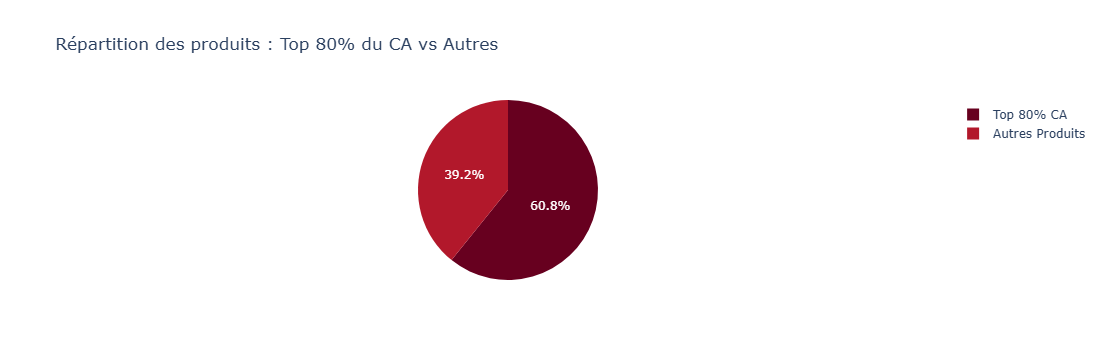

In [494]:
sizes_ = [TOTAL_PRODUIT_COUNT , TOTAL_PRODUIT_DF - TOTAL_PRODUIT_COUNT ]
names_ = ['Top 80% CA', 'Autres Produits']

fig = px.pie(values = sizes_ , 
              names = names_ ,
              title='Répartition des produits : Top 80% du CA vs Autres',
              color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

## Le résultat montre que 80 % du chiffre d'affaire est généré par environ 61 % de produit .Ainsi, la loi de pareto n'est pas strictement respectée ce qui peut indiquer une offre de prix des produits relativement homogene

- AFFICHAGE DE NOS PRODUITS PRODUISANT 80% DU CHIFFRE D'AFFAIRE

In [340]:
Ensemble_des_produits.loc[
    Ensemble_des_produits['Top 20% Produit'] == True,
    ['product_id', 'post_name', 'price', 'purchase_price', 'total_sales', 'CA', 'part %', 'Cumule %','Top 20% Produit']
].sort_values(by='Cumule %',ascending = False)

,product_id,post_name,price,purchase_price,total_sales,CA,part %,Cumule %,Top 20% Produit
364,4865,mourgues-du-gres-costieres-de-nimes-capitelles...,9.8,5.16,15.0,147.0,0.001023,0.799839,True
37,4075,plateau-chenes-lirac-2015,14.7,7.97,10.0,147.0,0.001023,0.798816,True
323,4728,schoech-gewurztraminer-vt-2017,29.5,14.48,5.0,147.5,0.001027,0.797792,True
277,4664,la-cotelleraie-saint-nicolas-de-bourgueil-le-v...,16.4,8.39,9.0,147.6,0.001027,0.796766,True
420,4978,chateau-dutruch-grand-poujeaux-moulis-2016,18.5,9.46,8.0,148.0,0.001030,0.795739,True
...,...,...,...,...,...,...,...,...,...
653,6212,domaine-des-comtes-lafon-volnay-1er-cru-santen...,115.0,59.42,7.0,805.0,0.005603,0.044298,True
582,5826,agnes-levet-amethyste-2017,41.2,21.71,20.0,824.0,0.005735,0.038696,True
200,4353,champagne-egly-ouriet-grand-cru-brut-rose,79.5,45.91,14.0,1113.0,0.007746,0.032961,True
587,5892,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,191.3,116.06,6.0,1147.8,0.007989,0.025214,True


- Comparaison entre ceux qui rapportent en terme de CA et ceux qui rapportent en terme de vente 

In [342]:
top_10_CA = Ensemble_des_produits.loc[Ensemble_des_produits['Top 20% Produit'] == True].sort_values(by='CA', ascending=False).head(10)

fig = px.bar( top_10_CA, y ='post_name' , x ='CA' , 
              text= top_10_CA['CA'].round(1),
              title='Les 10 produits avec de gros CA unique', 
             labels= {'post_name':'Produit','CA':'Chiffre d’affaires'} )

fig.update_layout(
    width=1000,
    height=600,
   
)
fig.show()

In [343]:
top_10_Vente = Ensemble_des_produits.sort_values(by='total_sales', ascending=False).head(10)

fig = px.bar( top_10_Vente , y ='post_name' , x ='total_sales' , 
              text='total_sales',
              title='Les 10 produits avec les grands nombre de vente', 
             labels= {'post_name':'Produit','total_sales':'Nombre de vente'} )

fig.update_layout(
    width=1000,
    height=600,
   
)
fig.show()

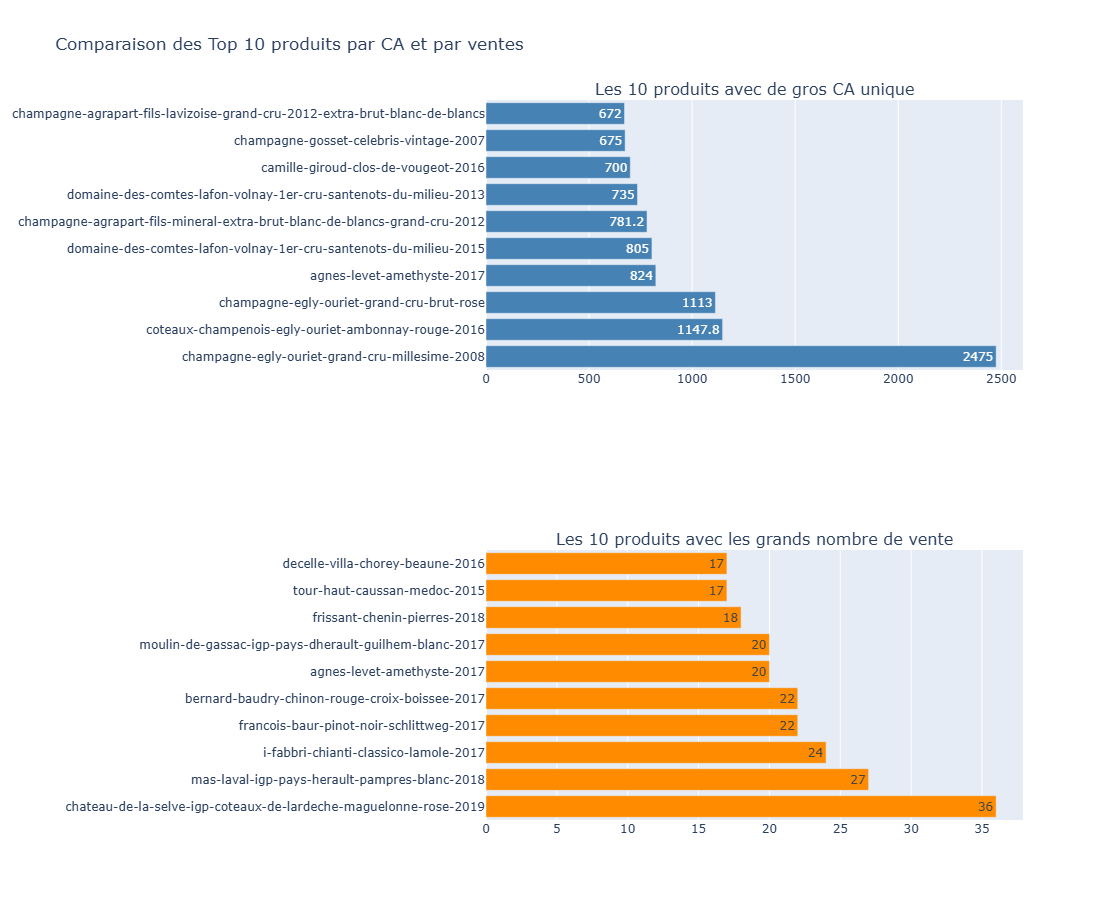

In [345]:
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=(
        "Les 10 produits avec de gros CA unique",
        "Les 10 produits avec les grands nombre de vente"
    )
)

fig.add_trace(
    go.Bar(
        y=top_10_CA['post_name'],
        x=top_10_CA['CA'],
        orientation='h',
        name='CA',
        marker_color='steelblue',
        text=top_10_CA['CA'].round(1),
        textposition='auto'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(
        y=top_10_Vente['post_name'],
        x=top_10_Vente['total_sales'],
        orientation='h',
        name='Ventes',
        marker_color='darkorange',
        text=top_10_Vente['total_sales'],
        textposition='auto'
    ),
    row=2, col=1
)


fig.update_layout(
    width=1000,
    height=900,  
    title_text='Comparaison des Top 10 produits par CA et par ventes',
    showlegend=False,
    font=dict(size=12) 
)

fig.show()

### Dans les produits les plus rentables en termes de vente et de chiffre d'affaires, on va essayer de ressortir ceux qui se démarquent des deux côtés.

In [353]:
print(top_10_Vente[['post_name','total_sales']])

print(" ===============  =============== ===============" )

print(top_10_CA[['post_name','CA']])

                                             post_name  total_sales
365  chateau-de-la-selve-igp-coteaux-de-lardeche-ma...         36.0
122      mas-laval-igp-pays-herault-pampres-blanc-2018         27.0
175              i-fabbri-chianti-classico-lamole-2017         24.0
321           francois-baur-pinot-noir-schlittweg-2017         22.0
265     bernard-baudry-chinon-rouge-croix-boissee-2017         22.0
582                         agnes-levet-amethyste-2017         20.0
645  moulin-de-gassac-igp-pays-dherault-guilhem-bla...         20.0
135                       frissant-chenin-pierres-2018         18.0
570                       tour-haut-caussan-medoc-2015         17.0
673                   decelle-villa-chorey-beaune-2016         17.0
 ===============  =============== ===============
                                             post_name      CA
199     champagne-egly-ouriet-grand-cru-millesime-2008  2475.0
587  coteaux-champenois-egly-ouriet-ambonnay-rouge-...  1147.8
200          

In [354]:
RV = set(top_10_Vente['post_name'])
RC = set(top_10_CA['post_name'])

union_produit_nbr_vente_ca = RV & RC

In [355]:
Ensemble_des_produits[Ensemble_des_produits['post_name'].isin(union_produit_nbr_vente_ca)]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,virtual,downloadable,...,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count,CA,part %,Cumule %,Top 20% Produit
582,5826,1,41.2,34,instock,21.71,15325,15325,0,0,...,2020-05-21 12:00:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,824.0,0.005735,0.038696,True


In [359]:
PP = Ensemble_des_produits[Ensemble_des_produits['product_id'] == 5826 ]
PP[['product_id', 'post_name', 'price', 'purchase_price', 'total_sales', 'CA', 'part %', 'Cumule %','Top 20% Produit']]

,product_id,post_name,price,purchase_price,total_sales,CA,part %,Cumule %,Top 20% Produit
582,5826,agnes-levet-amethyste-2017,41.2,21.71,20.0,824.0,0.005735,0.038696,True


On observe que certains produits comme le agnes-levet-amethyste-2017 combinent un bon CA et de bonnes ventes. Ce sont des produits à fort levier économique

## Détection des valeurs aberrantes sur les prix

Suite à l’analyse de la répartition du chiffre d'affaires par produit, nous avons constaté que **la règle de Pareto (80/20)** n'était **pas strictement respectée** dans notre base : environ **61 % des produits** génèrent **80 % du chiffre d’affaires**. Cela peut refléter une certaine homogénéité dans l’offre commerciale ou une stratégie de tarification étalée.

Afin de vérifier si cette distribution est également affectée par **des valeurs aberrantes**, nous avons appliqué une détection d’**outliers** sur la variable `price`, à l’aide des méthodes Z-score et de l’écart interquartile (IQR).


### Utilisation du Z-score

In [365]:
erp_liaison_web['z_score'] = zscore(erp_liaison_web['price'])

outliers_des_prix = erp_liaison_web[ (erp_liaison_web['z_score'] > 3) | (erp_liaison_web['z_score']< -3) ]

print(f" En utilisant le z-score on trouve {len(outliers_des_prix)} outliers ")

 En utilisant le z-score on trouve 13 outliers 


## Utilisation de l’écart interquartile (IQR)

⬇️ Cette fonction utilise la methode de l'écart intercatile

 dans la colonne price nous avons 31 outliers


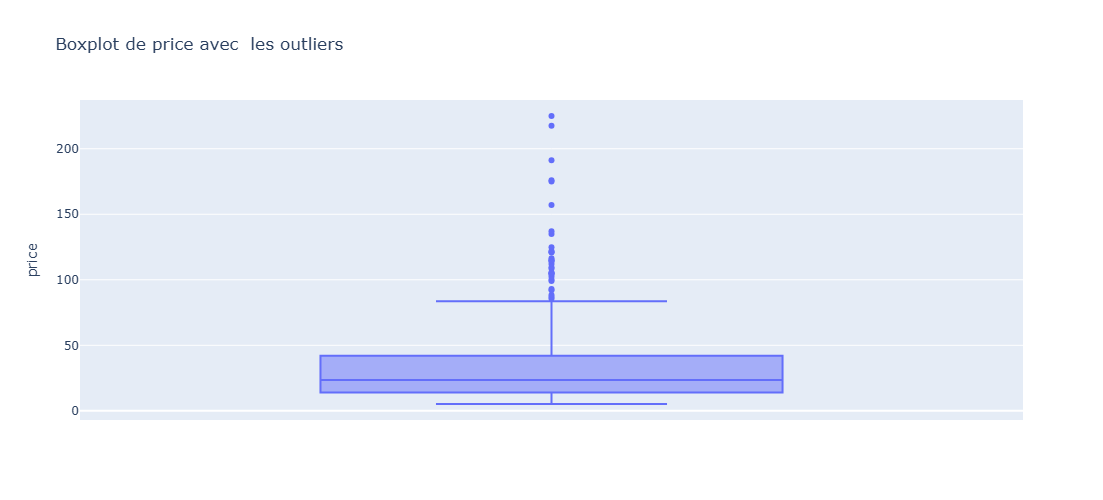

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,virtual,downloadable,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count,CA,z_score
63,4115,1,100.0,12,instock,52.70,15382,15382,0,0,...,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,2020-02-08 11:45:02,2020-02-08 10:45:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,100.0,2.453723
65,4132,1,88.4,7,instock,44.30,11668,11668,0,0,...,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,2020-02-20 09:55:02,2020-02-20 08:55:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,442.0,2.033082
199,4352,1,225.0,0,outofstock,137.81,15940,15940,0,0,...,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,2475.0,6.986486
205,4359,1,85.6,112,instock,51.93,13853,13853,0,0,...,champagne-larmandier-bernier-grand-cru-vieille...,2019-12-23 09:30:11,2019-12-23 08:30:11,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,599.2,1.931549
218,4402,1,176.0,11,instock,78.25,3510,3510,0,0,...,cognac-frapin-vip-xo,2020-08-22 11:35:03,2020-08-22 09:35:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,528.0,5.209643
219,4404,1,108.5,17,instock,52.22,3507,3507,0,0,...,cognac-frapin-fontpinot-xo,2020-08-12 09:30:16,2020-08-12 07:30:16,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,434.0,2.761951
221,4406,1,157.0,12,instock,69.08,7819,7819,0,0,...,cognac-frapin-chateau-de-fontpinot-1989-20-ans,2020-03-14 16:05:04,2020-03-14 15:05:04,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,628.0,4.520663
222,4407,1,104.0,14,instock,46.71,3509,3509,0,0,...,cognac-frapin-cigar-blend,2020-07-04 09:45:03,2020-07-04 07:45:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,520.0,2.598771
227,4582,1,109.6,18,instock,53.80,12857,12857,0,0,...,chateau-de-puligny-montrachet-1cru-champ-canet...,2020-02-06 16:35:02,2020-02-06 15:35:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,109.6,2.801839
380,4903,1,102.3,12,instock,51.80,14805,14805,0,0,...,domaine-des-croix-corton-grand-cru-les-greves-...,2020-06-27 09:00:07,2020-06-27 07:00:07,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,204.6,2.537126


In [374]:
detection_des_outliers(erp_liaison_web,'price')

### Essayons maintenant avec la méthode des quartiles

In [377]:
Q1 = np.percentile(erp_liaison_web['price'],25)
print(f" Le premier quartile : {Q1:.1f} ")

 Le premier quartile : 14.1 


In [379]:
Q3 = np.percentile(erp_liaison_web['price'],75)
print(f" Le troisième quartile: {Q3:.1f} ")

 Le troisième quartile: 42.1 


In [381]:
IQR = Q3 - Q1

print(f" L'ecart inter quartile : {IQR:.1f} ")

 L'ecart inter quartile : 28.0 


In [383]:
la_borne_inf = Q1 - 1.5 * IQR
la_borne_sup = Q3 + 1.5 * IQR

print(f" la borne superieur : {la_borne_sup:.1f} , la borne inferieur : {la_borne_inf:.1f} ")

 la borne superieur : 84.1 , la borne inferieur : -28.0 


In [385]:
valeurs = erp_liaison_web[ ( erp_liaison_web['price'] < la_borne_inf ) | (erp_liaison_web['price'] > la_borne_sup) ]
print(f" Avec la méthode de l'écart interquartile on trouve {len(valeurs)} outliers ")

 Avec la méthode de l'écart interquartile on trouve 31 outliers 


In [387]:
OTVP = valeurs.sort_values(by='price', ascending = False)
OTVP[['product_id','post_name','price','purchase_price','z_score']]

,product_id,post_name,price,purchase_price,z_score
199,4352,champagne-egly-ouriet-grand-cru-millesime-2008,225.0,137.81,6.986486
426,5001,david-duband-charmes-chambertin-grand-cru-2014,217.5,116.87,6.714520
587,5892,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,191.3,116.06,5.764453
218,4402,cognac-frapin-vip-xo,176.0,78.25,5.209643
553,5767,camille-giroud-clos-de-vougeot-2016,175.0,90.42,5.173380
221,4406,cognac-frapin-chateau-de-fontpinot-1989-20-ans,157.0,69.08,4.520663
381,4904,domaine-des-croix-corton-charlemagne-grand-cru...,137.0,67.95,3.795421
642,6126,champagne-gosset-celebris-vintage-2007,135.0,80.33,3.722896
511,5612,domaine-weinbach-gewurztraminer-gc-furstentum-...,124.8,66.41,3.353023
603,5917,wemyss-malts-single-cask-scotch-whisky-choc-n-...,122.0,54.24,3.251489


- **31 produits** ont été identifiés comme ayant un prix fortement au-dessus des bornes statistiques normales.
- Ces produits incluent principalement des **champagnes, cognacs, grands crus et spiritueux premium**, ce qui peut justifier leur écart de prix.
- Par exemple :
  - *Champagne Egly-Ouriet Grand Cru Millésime 2008* : 225 FCFA
  - *Cognac Frapin VIP XO* : 176 FCFA
  - *Domaine des Comtes Lafon Volnay 1er Cru* (plusieurs déclinaisons entre 105 FCFA et 121 FCFA )

 **Ces valeurs ne sont pas nécessairement des erreurs**, mais elles doivent être **vérifiées manuellement** en lien avec la politique tarifaire. On peut aussi les **exclure temporairement** lors d’analyses sensibles au prix (moyenne, cluster, corrélations).

 ces prix atypiques peuvent refléter des produits rares ou une politique tarifaire non uniforme.On va verifier si ces produits outre d'etre cher sont vraiment rentables , et pout ca on va calculer la marge

### Calcul du taux de marge , ce taux nous permet de voir si un produit est rentable

- si TVA = 20 %

In [498]:
erp_liaison_web['price_ht'] = erp_liaison_web['price'] / 1.2  
erp_liaison_web['marge_unitaire'] = erp_liaison_web['price_ht'] - erp_liaison_web['purchase_price']
erp_liaison_web['taux_de_marge'] = erp_liaison_web['marge_unitaire'] / erp_liaison_web['price_ht']


In [500]:
erp_liaison_web['marge_totale'] = erp_liaison_web['marge_unitaire'] * erp_liaison_web['total_sales']
valeurs = erp_liaison_web[ ( erp_liaison_web['price'] < la_borne_inf ) | (erp_liaison_web['price'] > la_borne_sup) ]


marge_total = erp_liaison_web['marge_totale'].sum()


les_outliers_marge = valeurs['marge_unitaire'] * valeurs['total_sales']
marge_outliers = les_outliers_marge.sum()


la_part_marge_outliers = marge_outliers / marge_total

print(f"la marge totale : {marge_total:.2F} " )
print(f"la marge des outliers : {marge_outliers:.2F} ")
print(f"la part de marge des outliers : {la_part_marge_outliers:.2F} ")

la marge totale : 44660.65 
la marge des outliers : 4873.46 
la part de marge des outliers : 0.11 


Index(['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status',
       'purchase_price', 'id_web', 'sku', 'virtual', 'downloadable',
       'rating_count', 'average_rating', 'total_sales', 'tax_status',
       'post_author', 'post_date', 'post_date_gmt', 'product_type',
       'post_title', 'post_excerpt', 'post_status', 'comment_status',
       'ping_status', 'post_name', 'post_modified', 'post_modified_gmt',
       'post_parent', 'guid', 'menu_order', 'post_type', 'comment_count', 'CA',
       'z_score', 'price_ht', 'marge_unitaire', 'taux_de_marge',
       'marge_totale', 'rotation_stock', 'duree_stock_mois',
       'alerte_produit_anomalie_critique', 'alerte_stock_dormant'],
      dtype='object')

### Rotation des stocks

In [400]:
erp_liaison_web['rotation_stock'] = erp_liaison_web['total_sales'] / (erp_liaison_web['stock_quantity'] + 1)

### Durée moyenne des stocks en mois 

In [403]:
erp_liaison_web['duree_stock_mois'] = 12 / (erp_liaison_web['rotation_stock'] + 1e-6)

### Vérification : produits premium ou erreurs de tarification

Pour analyser les produits à prix extrêmes, nous avons croisé plusieurs critères métier :

- **Produit très cher + vendu souvent** → probablement un **produit premium** (positionnement volontaire)
- **Produit très cher + jamais vendu** → probablement une **erreur de prix** ou produit inadapté au marché
- **Produit très cher + marge faible ou négative** → tarification incohérente, à corriger
- **Produit très cher + bonne marge** → à conserver comme produit haut de gamme


In [407]:
valeurs = erp_liaison_web[ ( erp_liaison_web['price'] < la_borne_inf ) | (erp_liaison_web['price'] > la_borne_sup) ]
valeurs[['product_id','post_name','price','purchase_price','marge_unitaire','total_sales','rotation_stock','duree_stock_mois','marge_totale','z_score']].sort_values(by='duree_stock_mois')

,product_id,post_name,price,purchase_price,marge_unitaire,total_sales,rotation_stock,duree_stock_mois,marge_totale,z_score
199,4352,champagne-egly-ouriet-grand-cru-millesime-2008,225.0,137.81,49.690000,11.0,11.000000,1.090909,546.590000,6.986486
502,5565,tempier-bandol-cabassaou-2017,92.0,46.11,30.556667,1.0,1.000000,11.999988,30.556667,2.163626
65,4132,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,88.4,44.30,29.366667,5.0,0.625000,19.199969,146.833333,2.033082
655,6214,domaine-des-comtes-lafon-volnay-1er-cru-champa...,99.0,49.62,32.880000,6.0,0.600000,19.999967,197.280000,2.417461
432,5008,domaine-des-comtes-lafon-volnay-1er-cru-santen...,105.0,56.42,31.080000,7.0,0.538462,22.285673,217.560000,2.635033
602,5916,wemyss-malts-single-cask-chocolate-moka-cake,93.0,40.49,37.010000,1.0,0.500000,23.999952,37.010000,2.199888
653,6212,domaine-des-comtes-lafon-volnay-1er-cru-santen...,115.0,59.42,36.413333,7.0,0.411765,29.142786,254.893333,2.997654
648,6202,domaine-clerget-echezeaux-en-orveaux-2015,116.4,63.15,33.850000,5.0,0.384615,31.199919,169.250000,3.048421
647,6201,david-duband-chambolle-musigny-1er-cru-les-sen...,105.6,57.29,30.710000,6.0,0.352941,33.999904,184.260000,2.656791
222,4407,cognac-frapin-cigar-blend,104.0,46.71,39.956667,5.0,0.333333,35.999892,199.783333,2.598771


### Analyse approfondie des produits à prix extrêmes

Nous avons extrait 31 produits dont le prix dépasse largement les bornes statistiques. Pour chacun, nous avons étudié :
- La marge unitaire
- Le volume de ventes
- La rotation de stock
- La durée moyenne de stockage (en mois)
- La marge totale générée

#### Résultats :

- Certains produits très chers (ex : *champagne-egly-ouriet*) se vendent très bien avec un bon renouvellement de stock. Ce sont clairement des produits **premium justifiés**.
- D'autres produits, comme *tempier-bandol* ou *chateau-de-puligny*, ont été vendus **une seule fois** en plusieurs années, avec des durées de stockage dépassant **200 mois**. Ces produits posent un **risque de stock immobilisé**.
- Quelques produits très chers ont été vendus à **faible fréquence** mais génèrent une bonne marge : ils méritent une **surveillance** ou un **ajustement de prix léger**.

#### Recommandations :
- Vérifier si les prix des produits vendus **1 à 2 fois seulement** sont justifiés (positionnement premium vs erreur)
- Analyser les stocks avec une durée > 36 mois : il peut s'agir d’**anomalies de saisie** ou de **stocks oubliés**
- Mettre en place un **système d’alerte automatique** pour les produits :
  - à prix élevé
  - avec marge faible
  - et très faible rotation


In [539]:

# =============== Définition des seuils pour les problèmes de performance ---
SEUIL_ROTATION_FAIBLE = 0.2
SEUIL_DUREE_LONGUE = 36  
SEUIL_TAUX_MARGE_CRITIQUE = 0.10 
SEUIL_VENTES_CRITIQUES = 5   

# ======= Condition d'Outlier de Prix ---
condition_prix_aberrant = (
    (erp_liaison_web['price'] < la_borne_inf) |
    (erp_liaison_web['price'] > la_borne_sup)
)

# ======= Condition de Problème de Performance ---
condition_probleme_performance = (
    (erp_liaison_web['rotation_stock'] < SEUIL_ROTATION_FAIBLE) |
    (erp_liaison_web['duree_stock_mois'] > SEUIL_DUREE_LONGUE) |
    (erp_liaison_web['taux_de_marge'] < SEUIL_TAUX_MARGE_CRITIQUE) |
    (erp_liaison_web['total_sales'] < SEUIL_VENTES_CRITIQUES)
)

# ===============  Combinaison des deux parties : Le produit est en alerte si c'est un outlier de prix ET qu'il a un problème de performance ---
erp_liaison_web['alerte_produit_anomalie_critique'] = (
    condition_prix_aberrant &
    condition_probleme_performance
)

In [414]:
valeurs = erp_liaison_web[ (erp_liaison_web['price'] < la_borne_inf) | (erp_liaison_web['price'] > la_borne_sup) ]

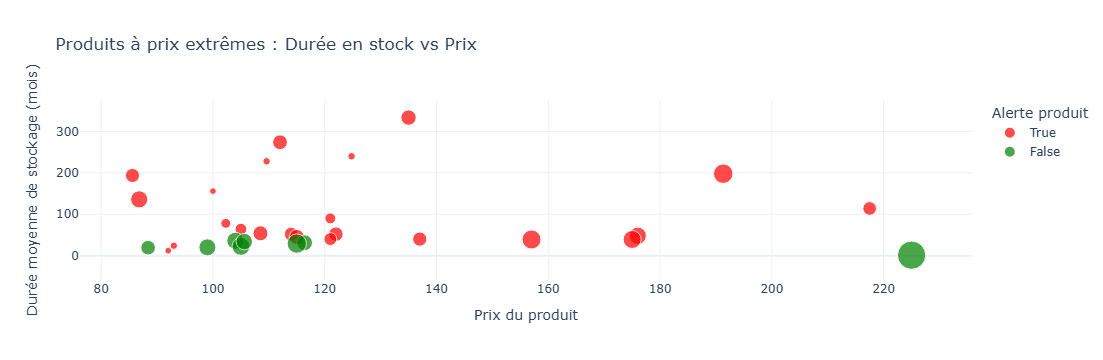

In [416]:
fig = px.scatter(
    valeurs, 
    x='price', 
    y='duree_stock_mois',
    color='alerte_produit_anomalie_critique',
    size='marge_totale',
    hover_data=['post_name', 'total_sales', 'rotation_stock', 'marge_unitaire', 'marge_totale'],
    title='Produits à prix extrêmes : Durée en stock vs Prix',
    color_discrete_map={True: 'red', False: 'green'}
)

fig.update_layout(
    xaxis_title='Prix du produit ',
    yaxis_title='Durée moyenne de stockage (mois)',
    legend_title='Alerte produit',
    template='plotly_white'
)

fig.show()

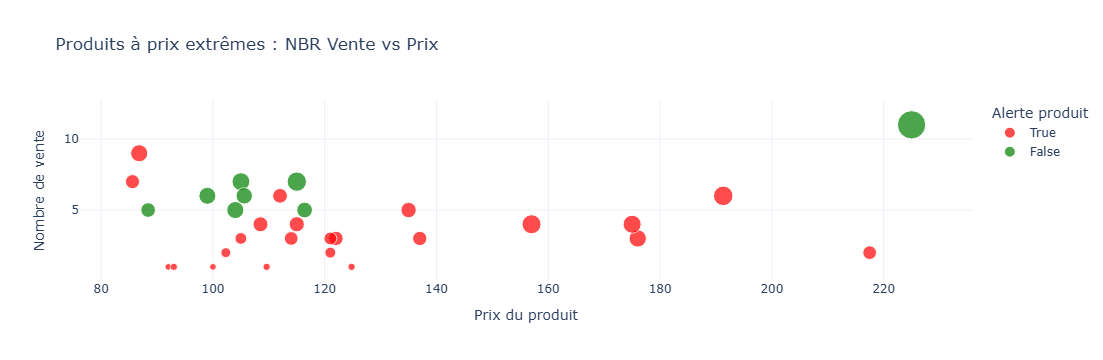

In [418]:
fig = px.scatter(
    valeurs, 
    x='price', 
    y='total_sales',
    color='alerte_produit_anomalie_critique',
    size='marge_totale',
    hover_data=['post_name', 'total_sales', 'rotation_stock', 'marge_unitaire', 'marge_totale'],
    title='Produits à prix extrêmes : NBR Vente vs Prix',
    color_discrete_map={True: 'red', False: 'green'}
)

fig.update_layout(
    xaxis_title='Prix du produit ',
    yaxis_title='Nombre de vente',
    legend_title='Alerte produit',
    template='plotly_white'
)

fig.show()

- Les produist avec anomalie

In [421]:
produits_anomalie_critique = erp_liaison_web[erp_liaison_web['alerte_produit_anomalie_critique']]
print(f"Nombre de produits identifiés comme 'Anomalie Critique' : {len(produits_anomalie_critique)}")


Nombre de produits identifiés comme 'Anomalie Critique' : 23


In [423]:
produits_anomalie_critique[['post_title', 'price', 'total_sales', 'stock_quantity', 'taux_de_marge','marge_totale', 'duree_stock_mois', 'rotation_stock']]

,post_title,price,total_sales,stock_quantity,taux_de_marge,marge_totale,duree_stock_mois,rotation_stock
63,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,100.0,1.0,12,0.367600,30.633333,155.997972,0.076923
205,Champagne Larmandier-Bernier Grand Cru Les Che...,85.6,7.0,112,0.272009,135.823333,193.711159,0.061947
218,Cognac Frapin VIP XO,176.0,3.0,11,0.466477,205.250000,47.999808,0.250000
219,Cognac Frapin Château de Fontpinot XO,108.5,4.0,17,0.422452,152.786667,53.999757,0.222222
221,Cognac Frapin Château de Fontpinot 1989 20 Ans...,157.0,4.0,12,0.472000,247.013333,38.999873,0.307692
227,Château de Meursault Puligny-Montrachet 1er Cr...,109.6,1.0,18,0.410949,37.533333,227.995668,0.052632
380,Domaine Des Croix Corton Grand Cru Les Grèves ...,102.3,2.0,12,0.392375,66.900000,77.999493,0.153846
381,Domaine Des Croix Corton Charlemagne Grand Cru...,137.0,3.0,9,0.404818,138.650000,39.999867,0.300000
426,David Duband Charmes-Chambertin Grand Cru 2014,217.5,2.0,18,0.355200,128.760000,113.998917,0.105263
431,Domaine des Comtes Lafon Volnay 1er Cru Santen...,105.0,3.0,15,0.361371,94.860000,63.999659,0.187500


- Ces produits sont identifiés comme présentant des anomalies critiques et sont classés comme 'à risque' pour plusieurs raisons. Bien que certains d'entre eux puissent être des produits haut de gamme dont le prix est naturellement élevé, leur classification en 'risque' découle d'une combinaison de facteurs :

**Leur prix de vente se situe en dehors des bornes statistiques (définies par l'IQR)**, ce qui peut indiquer une erreur de saisie, un positionnement tarifaire incohérent, ou une valeur atypique nécessitant vérification.**Un prix très élevé, même justifié, peut par exemple limiter les ventes.**

**Problème de Performance sous-jacent :** En plus de cette anomalie de prix, ces produits présentent au moins un des indicateurs de performance préoccupants suivants :

**Rotation de stock très faible :** Le produit se vend très peu par rapport au stock disponible, ce qui ralentit la circulation du capital.

**Durée de stock excessive :** Le produit est immobilisé dans l'entrepôt depuis une période trop longue (plus de trois ans dans notre cas), représentant un coût de stockage et un risque d'obsolescence.

**Marge critique ou trop faible :** Le produit génère une marge insuffisante (inférieure à 10%) ou potentiellement nulle/négative, le rendant peu rentable, voire coûteux à vendre.

**Ventes très faibles :** Un volume de ventes minimal (moins de 5 unités sur la période) indique un manque d'attractivité ou de visibilité du produit.

## **Marge totale**  

**Nous identifions ici les 10 produits les plus rentables selon la marge totale. Cela permet de repérer ceux qui génèrent le plus de profit unitaire multiplié par les ventes.**

# Top 10 des produits les plus rentables

In [430]:
top_marge = erp_liaison_web.sort_values(by='marge_totale', ascending=False).head(10)
top_marge[['post_title', 'price', 'purchase_price', 'marge_unitaire', 'taux_de_marge','marge_totale','total_sales','rotation_stock','duree_stock_mois']]

,post_title,price,purchase_price,marge_unitaire,taux_de_marge,marge_totale,total_sales,rotation_stock,duree_stock_mois
199,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.0,137.81,49.690000,0.265013,546.590000,11.0,11.000000,1.090909
200,Champagne Egly-Ouriet Grand Cru Brut Rosé,79.5,45.91,20.340000,0.307019,284.760000,14.0,0.109375,109.713283
587,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,191.3,116.06,43.356667,0.271971,260.140000,6.0,0.060606,197.996733
653,Domaine des Comtes Lafon Volnay 1er Cru Santen...,115.0,59.42,36.413333,0.379965,254.893333,7.0,0.411765,29.142786
582,Agnès Levet Côte Rôtie Améthyste 2017,41.2,21.71,12.623333,0.367670,252.466667,20.0,0.571429,20.999963
221,Cognac Frapin Château de Fontpinot 1989 20 Ans...,157.0,69.08,61.753333,0.472000,247.013333,4.0,0.307692,38.999873
553,Camille Giroud Clos de Vougeot 2016,175.0,90.42,55.413333,0.379977,221.653333,4.0,0.307692,38.999873
432,Domaine des Comtes Lafon Volnay 1er Cru Santen...,105.0,56.42,31.080000,0.355200,217.560000,7.0,0.538462,22.285673
265,Bernard Baudry Chinon Rouge La Croix Boissée 2017,28.5,14.14,9.610000,0.404632,211.420000,22.0,0.478261,25.090857
218,Cognac Frapin VIP XO,176.0,78.25,68.416667,0.466477,205.250000,3.0,0.250000,47.999808


###  Produits les plus rentables en valeur (Top marge totale)

Nous avons extrait les 10 produits qui génèrent le plus de **marge totale**, c’est-à-dire ceux qui contribuent le plus directement à la rentabilité globale de l’entreprise.

- Tous ces produits ont une marge unitaire élevée (de 9 à 68 FCFA).
- Ils affichent aussi un taux de marge supérieur à 25 %, ce qui en fait des produits solides.
- Certains, comme le *Champagne Egly-Ouriet Millésimé 2008*, combinent à la fois **bon volume de vente** et **très bon positionnement tarifaire**.
- D'autres, comme les Cognacs Frapin, ont une rotation lente, mais génèrent une forte marge par unité → ce sont des produits **premium bien positionnés**.

Ces produits doivent être considérés comme des **leviers prioritaires** pour la stratégie commerciale.


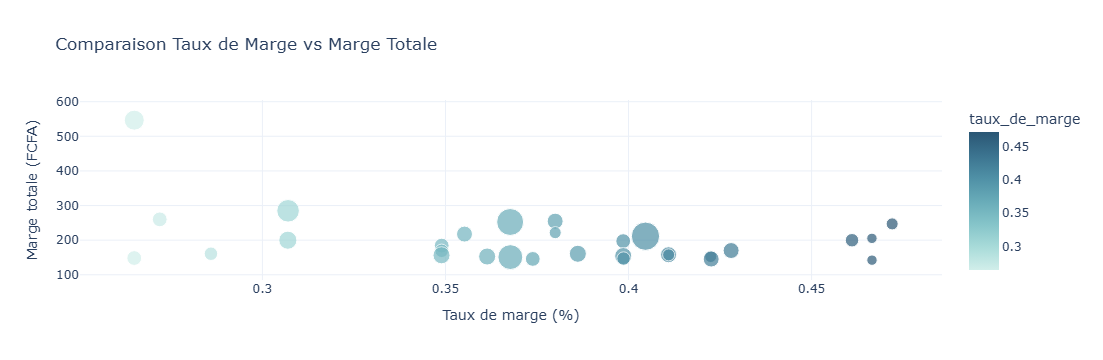

In [433]:
top_marge_plot = erp_liaison_web.sort_values(by='marge_totale', ascending=False).head(30)

fig = px.scatter(
    top_marge_plot,
    x='taux_de_marge',
    y='marge_totale',
    size='total_sales',  
    color='taux_de_marge',
    hover_data=['post_title', 'price', 'marge_unitaire', 'total_sales'],
    title='Comparaison Taux de Marge vs Marge Totale',
    color_continuous_scale='Teal'
)

fig.update_layout(
    xaxis_title='Taux de marge (%)',
    yaxis_title='Marge totale (FCFA)',
    template='plotly_white'
)

fig.show()

### Visualisation croisée : Taux de Marge vs Marge Totale

Le graphique ci-dessous permet d’identifier visuellement les produits les plus performants en croisant :
- leur **taux de marge (%)** → rentabilité unitaire
- leur **marge totale (FCFA)** → contribution réelle au profit

Les produits en haut à droite cumulent un bon taux de marge et un bon volume de ventes : ce sont les produits **les plus stratégiques** à conserver et à pousser commercialement.


# Top 10 des produits les moins rentables 

In [439]:
bottom_marge = erp_liaison_web.sort_values(by='marge_totale', ascending=True).head(10)
bottom_marge[['post_title', 'price', 'purchase_price', 'marge_unitaire', 'taux_de_marge','marge_totale','total_sales','rotation_stock','duree_stock_mois']]

,post_title,price,purchase_price,marge_unitaire,taux_de_marge,marge_totale,total_sales,rotation_stock,duree_stock_mois
116,Château de La Liquière Faugères Tucade 2015,27.2,14.05,8.616667,0.380147,0.0,0.0,0.0,12000000.0
454,Liban Vallée de la Békaa Château Marsyas 2012,28.8,15.18,8.820000,0.367500,0.0,0.0,0.0,12000000.0
248,Alphonse Mellot Sancerre Rouge La Moussière 2014,30.6,16.44,9.060000,0.355294,0.0,0.0,0.0,12000000.0
41,Le Vieux Donjon Châteauneuf-du-Pape 2013,37.0,19.50,11.333333,0.367568,0.0,0.0,0.0,12000000.0
212,Wemyss Malts Blended Malt Scotch Whisky The Hi...,62.0,28.42,23.246667,0.449935,0.0,0.0,0.0,12000000.0
367,Tempier Bandol Rosé 2019,22.8,11.90,7.100000,0.373684,0.0,0.0,0.0,12000000.0
622,I Fabbri Chianti Classico Gran Selezione 2015,48.5,25.31,15.106667,0.373773,0.0,0.0,0.0,12000000.0
54,Emile Boeckel Gewurztraminer Grand Cru Zotzenb...,15.8,8.57,4.596667,0.349114,0.0,0.0,0.0,12000000.0
16,Clos du Mont-Olivet Châteauneuf-du-Pape Blanc ...,33.7,18.11,9.973333,0.355134,0.0,0.0,0.0,12000000.0
15,Jeanne Gaillard IGP Collines Rhodaniennes Syra...,7.7,4.14,2.276667,0.354805,0.0,0.0,0.0,12000000.0


## Comparaison taux de marge vs marge totale

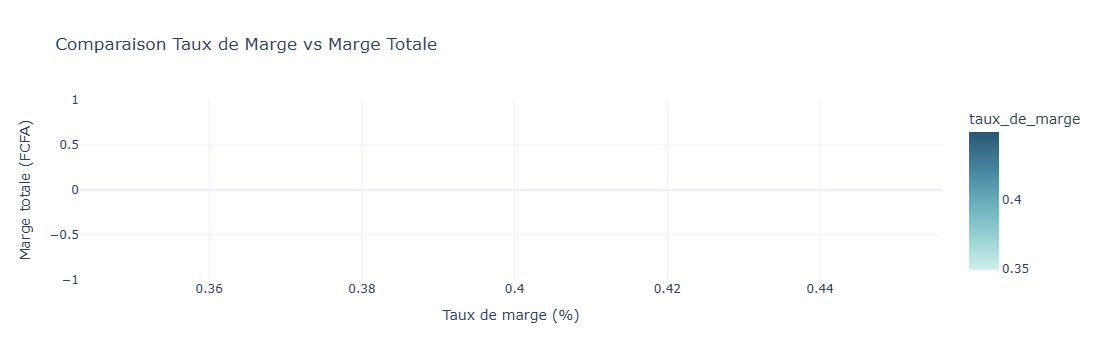

In [442]:
bottom_marge = erp_liaison_web.sort_values(by='marge_totale', ascending=True).head(10)

fig = px.scatter(
    bottom_marge,
    x='taux_de_marge',
    y='marge_totale',
    size='total_sales',  
    color='taux_de_marge',
    hover_data=['post_title', 'price', 'marge_unitaire', 'total_sales'],
    title='Comparaison Taux de Marge vs Marge Totale',
    color_continuous_scale='Teal'
)

fig.update_layout(
    xaxis_title='Taux de marge (%)',
    yaxis_title='Marge totale (FCFA)',
    template='plotly_white'
)

fig.show()

Ces produits n’ont généré **aucune marge totale** car ils **n’ont jamais été vendus**. Pourtant, leur taux de marge est correct, ce qui indique un problème potentiel ailleurs :

- Produit bloqué ou indisponible en stock
- Erreur de publication sur le site
- Produit peu visible ou non attractif pour les clients

Ces cas doivent faire l’objet d’une **vérification commerciale ou marketing**. Un produit non vendu est un **manque à gagner potentiel**, surtout quand la marge est bonne.

In [448]:
erp_liaison_web[erp_liaison_web['stock_quantity'] < 0 ]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,virtual,downloadable,...,comment_count,CA,z_score,price_ht,marge_unitaire,taux_de_marge,marge_totale,rotation_stock,duree_stock_mois,alerte_produit_anomalie_critique
528,5700,1,44.5,-1,outofstock,22.3,14736,14736,0,0,...,0.0,356.0,0.441176,37.083333,14.783333,0.398652,118.266667,inf,0.0,False


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 10px; color: rgb(196, 25, 65); "> Anomalie détectée
</div>

Un contrôle qualité des stocks a révélé une anomalie sur certains produits, dont le champ stock_quantity est négatif. Ce cas particulier (stock = -1) génère une durée de stockage infinie (inf) lors du calcul automatique. Cette valeur a été traitée comme une erreur de saisie dans le visuel précedent et exclue des visualisations et calculs agrégés, afin de ne pas biaiser l’analyse.

## **Rotation de stock**

# Top 10 des produits qui tournent le plus vite

In [517]:
erp_rotation_valide = erp_liaison_web[erp_liaison_web['stock_quantity'] >= 0]
top_rotation = erp_rotation_valide.sort_values(by='rotation_stock', ascending=False).head(10)
top_rotation[['post_title','price', 'total_sales', 'stock_quantity', 'rotation_stock', 'duree_stock_mois']]


,post_title,price,total_sales,stock_quantity,rotation_stock,duree_stock_mois
321,François Baur Pinot Noir Schlittweg 2017,12.7,22.0,0,22.0,0.545455
366,Triennes IGP Méditerranée Rosé 2019,9.3,16.0,0,16.0,0.750000
149,Parcé Frères IGP Côtes Catalanes Hommage à Fer...,8.9,15.0,0,15.0,0.800000
607,Borie La Vitarèle Languedoc Blanc Le Grand May...,14.1,14.0,0,14.0,0.857143
199,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.0,11.0,0,11.0,1.090909
368,Saumaize-Michelin Mâcon Vergisson Sur La Roche...,18.7,10.0,0,10.0,1.200000
304,Albert Mann Muscat 2018,16.8,10.0,0,10.0,1.200000
516,Albert Boxler Pinot Gris Réserve 2016,27.8,9.0,0,9.0,1.333333
159,Domaine Huet Vouvray Haut-Lieu Sec 2017,24.4,9.0,0,9.0,1.333333
479,Decelle-Villa Nuits-Saint-Georges Rouge 2016,43.5,9.0,0,9.0,1.333333


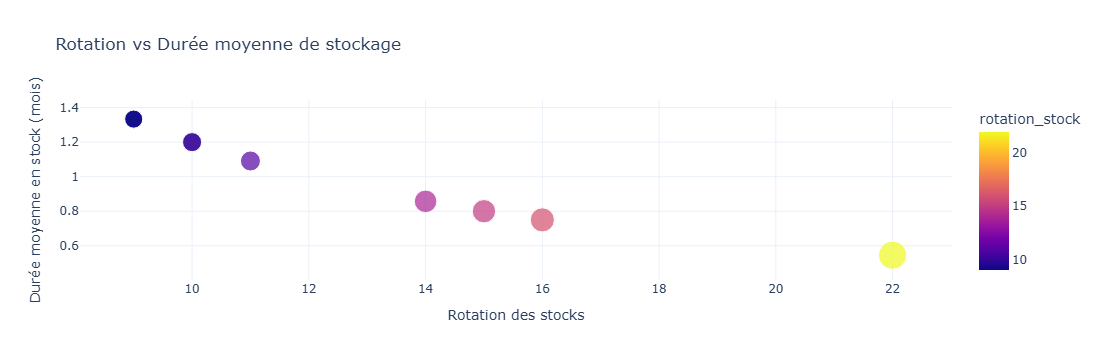

In [519]:
fig = px.scatter(
    top_rotation,
    x='rotation_stock',
    y='duree_stock_mois',
    size='total_sales',
    color='rotation_stock',
    hover_data=['post_title', 'total_sales', 'stock_quantity'],
    title="Rotation vs Durée moyenne de stockage",
    color_continuous_scale='Plasma'
)

fig.update_layout(
    xaxis_title='Rotation des stocks',
    yaxis_title='Durée moyenne en stock (mois)',
    template='plotly_white'
)

fig.show()

Ces produits affichent une rotation très élevée, signe d’une **forte demande client** et d’un **bon positionnement commercial** :

- Tous ont été **totalement vendus** (stock = 0)
- Leur durée moyenne de stockage est **inférieure à 1,5 mois**

Ce sont des produits à fort potentiel qu’il convient de :
- Recommander plus largement
- **Sécuriser en stock** pour éviter les ruptures
- Intégrer dans une **stratégie commerciale prioritaire**


In [534]:
top_10_fast_selling = erp_liaison_web.sort_values(by='rotation_stock', ascending=False).head(10)

ca_top_10 = top_10_fast_selling['CA'].sum()

ca_total_global = erp_liaison_web['CA'].sum()

if ca_total_global > 0:
    part_ca_top_10 = (ca_top_10 / ca_total_global) * 100
else:
    part_ca_top_10 = 0 


print(f"Chiffre d'Affaires total des 10 produits avec un bon taux de rotation : {ca_top_10:,.2f} FCFA".format().replace(',',' ') )
print(f"Chiffre d'Affaires total de tous les produits : {ca_total_global:,.2f} FCFA".format().replace(',',' ') )
print(f"Les 10 produits  représentent {part_ca_top_10:.2f} % du Chiffre d'Affaires total.".format().replace(',',' ') )

Chiffre d'Affaires total des 10 produits avec un bon taux de rotation : 4 586.80 FCFA
Chiffre d'Affaires total de tous les produits : 143 680.10 FCFA
Les 10 produits  représentent 3.19 % du Chiffre d'Affaires total.


Ces produits se vendent à une tres bonne vitesse mais ne represente que 3% du CA total parce que la majorité des produits vendus à de très grande vitesse sont à bas prix 

# Top 10 des produits qui stagnent (rotation la plus lente)

In [466]:
bottom_rotation = erp_rotation_valide[erp_rotation_valide['rotation_stock'] < 100].sort_values(by='rotation_stock', ascending=True).head(10)
bottom_rotation[['post_title', 'total_sales', 'stock_quantity', 'rotation_stock', 'duree_stock_mois']]


,post_title,total_sales,stock_quantity,rotation_stock,duree_stock_mois
668,Borie La Vitarèle Saint-Chinian Midi Rouge 2015,0.0,0,0.0,12000000.0
67,Zind-Humbrecht Zind 2017,0.0,0,0.0,12000000.0
608,Cognac Normandin Mercier VFC,0.0,13,0.0,12000000.0
201,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,0.0,97,0.0,12000000.0
622,I Fabbri Chianti Classico Gran Selezione 2015,0.0,0,0.0,12000000.0
212,Wemyss Malts Blended Malt Scotch Whisky The Hi...,0.0,0,0.0,12000000.0
248,Alphonse Mellot Sancerre Rouge La Moussière 2014,0.0,0,0.0,12000000.0
41,Le Vieux Donjon Châteauneuf-du-Pape 2013,0.0,0,0.0,12000000.0
54,Emile Boeckel Gewurztraminer Grand Cru Zotzenb...,0.0,0,0.0,12000000.0
16,Clos du Mont-Olivet Châteauneuf-du-Pape Blanc ...,0.0,0,0.0,12000000.0


Ces produits n’ont enregistré **aucune vente** depuis leur mise en base. Ils sont identifiés comme **produits dormants** avec une rotation nulle :

Caractéristiques :
- `total_sales = 0` → aucun client n’a acheté ces produits
- `stock_quantity` = 0 ou → certains sont en stock, d'autres non
- `duree_stock_mois` = 1 200 000 → durée fictive liée à l’absence de ventes

###  Hypothèses à vérifier :
- Erreur de saisie (produit non activé sur le site)
- Produit mal référencé (erreur sur le `sku`, `id_web`)
- Produit non attractif (prix, photo, description)
- Produit jamais approvisionné ou épuisé depuis longtemps

###  Recommandations :
- Faire un audit de ces produits avec l’équipe métier
- Retirer ou corriger ceux qui ne seront jamais vendus
- Mettre en avant ceux qui pourraient redevenir actifs

Ces produits immobilisent inutilement des lignes en base ou du stock → **à nettoyer ou réactiver**.


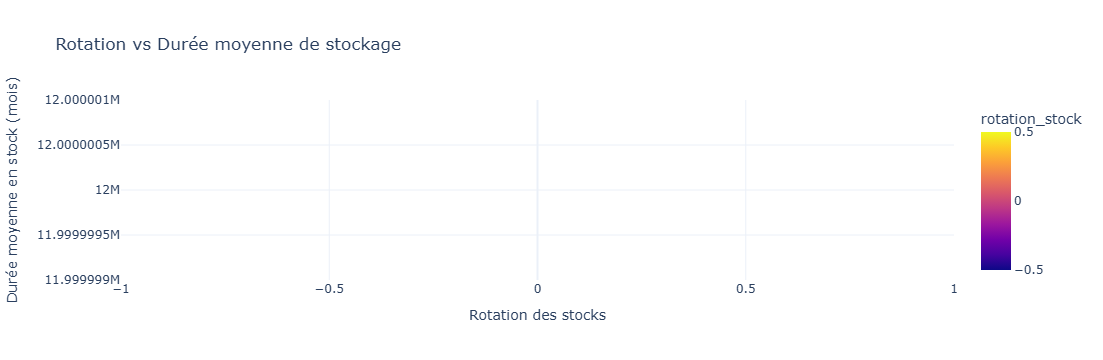

In [469]:
fig = px.scatter(
    bottom_rotation,
    x='rotation_stock',
    y='duree_stock_mois',
    size='total_sales',
    color='rotation_stock',
    hover_data=['post_title', 'total_sales', 'stock_quantity'],
    title="Rotation vs Durée moyenne de stockage",
    color_continuous_scale='Plasma'
)

fig.update_layout(
    xaxis_title='Rotation des stocks',
    yaxis_title='Durée moyenne en stock (mois)',
    template='plotly_white'
)

fig.show()

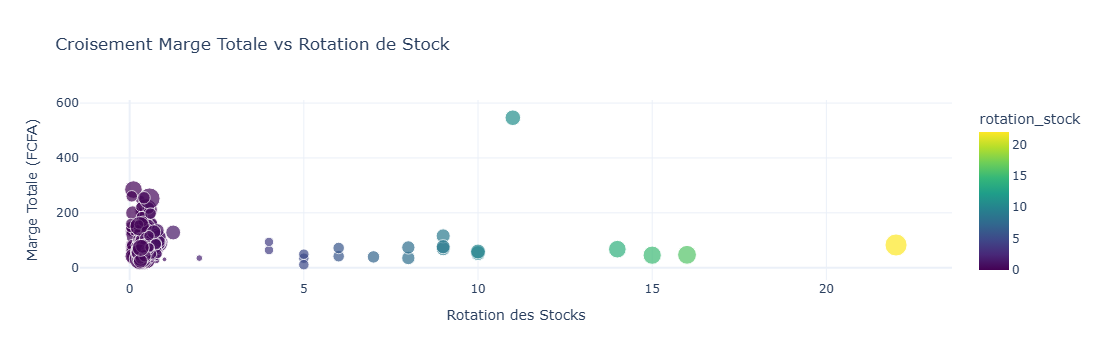

In [537]:
produits_valides = erp_liaison_web[erp_liaison_web['stock_quantity'] >= 0]

fig = px.scatter(
    produits_valides,
    x='rotation_stock',
    y='marge_totale',
    size='total_sales',
    color='rotation_stock',
    hover_data=['post_title', 'price', 'stock_quantity', 'marge_totale'],
    title='Croisement Marge Totale vs Rotation de Stock',
    color_continuous_scale='Viridis'
)

fig.update_layout(
    xaxis_title='Rotation des Stocks',
    yaxis_title='Marge Totale (FCFA)',
    template='plotly_white'
)

fig.show()


## Produits dormants ou bloqués

Les produits suivants cumulent une très longue durée de stockage et peu de ventes, ce qui indique un risque d'immobilisation de capital ou un désintérêt client.

In [474]:
produits_dormants = erp_liaison_web[(erp_liaison_web['duree_stock_mois'] > 100) & (erp_liaison_web['total_sales'] < 5) ].sort_values(by='duree_stock_mois', ascending=False)
produits_dormants[['post_title', 'price','CA','purchase_price', 'marge_unitaire', 'taux_de_marge','rotation_stock','duree_stock_mois','stock_quantity','stock_status']]

,post_title,price,CA,purchase_price,marge_unitaire,taux_de_marge,rotation_stock,duree_stock_mois,stock_quantity,stock_status
2,Pierre Jean Villa Crozes-Hermitage Accroche Co...,20.80,0.0,10.64,6.693333,0.386154,0.000000,1.200000e+07,0,outofstock
196,Champagne Mailly Grand Cru Les Echansons 2007,83.00,0.0,48.90,20.266667,0.293012,0.000000,1.200000e+07,145,instock
622,I Fabbri Chianti Classico Gran Selezione 2015,48.50,0.0,25.31,15.106667,0.373773,0.000000,1.200000e+07,0,outofstock
608,Cognac Normandin Mercier VFC,59.90,0.0,27.18,22.736667,0.455492,0.000000,1.200000e+07,13,instock
536,Albert Mann Gewurztraminer Vendanges Tardives ...,57.60,0.0,30.36,17.640000,0.367500,0.000000,1.200000e+07,0,outofstock
533,Domaine des Terres d'Ocre Saint-Pourçain Rouge...,10.80,0.0,5.69,3.310000,0.367778,0.000000,1.200000e+07,0,outofstock
490,Marc Colin Et Fils Chassagne-Montrachet Blanc ...,61.60,0.0,31.51,19.823333,0.386169,0.000000,1.200000e+07,0,outofstock
454,Liban Vallée de la Békaa Château Marsyas 2012,28.80,0.0,15.18,8.820000,0.367500,0.000000,1.200000e+07,0,outofstock
393,Cave de Castelmaure Corbières Rouge Vigneron 2018,7.00,0.0,3.65,2.183333,0.374286,0.000000,1.200000e+07,0,outofstock
367,Tempier Bandol Rosé 2019,22.80,0.0,11.90,7.100000,0.373684,0.000000,1.200000e+07,0,outofstock


Certains produits, présentent une combinaison critique : stock important, faible rotation et ancienneté élevée. Bien que leur marge soit correcte sur le papier, ils représentent une immobilisation logistique importante, sans retour immédiat. Ils doivent faire l’objet d’une surveillance spécifique, voire d’actions correctives ciblées.

## Actions possibles :
Mettre en avant commercialement ces produits (homepage, mise en coffret, pack découverte)

Tester une promo douce ou bundle avec des vins qui tournent mieux

Réévaluer les visuels, le wording ou le référencement si invisibles sur le site

Prioriser leur inclusion dans une campagne newsletter ou vente privée

## Création d'une alerte pour les produits dormant :

- stock_quantity > 100: On cherche les gros volumes de stock. 
- rotation_stock < 0.06: Une rotation très faible.
- duree_stock_mois > 36 : Le produit est en stock depuis plus de 3 ans. C'est un signe clair qu'il traîne.
- total_sales < 10: Moins de 10 ventes sur toute la période, c'est très peu et indique une faible demande.

In [479]:
erp_liaison_web['alerte_stock_dormant'] = (
    (erp_liaison_web['stock_quantity'] > 100) &            
    (erp_liaison_web['rotation_stock'] < 0.06) &         
    (erp_liaison_web['duree_stock_mois'] > 36) &         
    (erp_liaison_web['total_sales'] < 10)                  
)

In [481]:
erp_liaison_web[ (
    (erp_liaison_web['stock_quantity'] > 100) &          
    (erp_liaison_web['rotation_stock'] < 0.06) &         
    (erp_liaison_web['duree_stock_mois'] > 36) &       
    (erp_liaison_web['total_sales'] < 10)                
)]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,virtual,downloadable,...,CA,z_score,price_ht,marge_unitaire,taux_de_marge,marge_totale,rotation_stock,duree_stock_mois,alerte_produit_anomalie_critique,alerte_stock_dormant
70,4142,1,53.0,125,instock,32.15,11641,11641,0,0,...,212.0,0.749404,44.166667,12.016667,0.272075,48.066667,0.031746,3.779881e+02,False,True
75,4149,1,69.0,101,instock,40.25,7086,7086,0,0,...,345.0,1.329598,57.500000,17.250000,0.300000,86.250000,0.049020,2.447950e+02,False,True
76,4150,1,59.0,123,instock,35.45,1366,1366,0,0,...,354.0,0.966977,49.166667,13.716667,0.278983,82.300000,0.048387,2.479949e+02,False,True
194,4334,1,49.0,142,instock,30.01,7818,7818,0,0,...,343.0,0.604356,40.833333,10.823333,0.265061,75.763333,0.048951,2.451378e+02,False,True
196,4337,1,83.0,145,instock,48.90,4679,4679,0,0,...,0.0,1.837267,69.166667,20.266667,0.293012,0.000000,0.000000,1.200000e+07,False,True
197,4348,1,59.0,125,instock,34.76,12586,12586,0,0,...,295.0,0.966977,49.166667,14.406667,0.293017,72.033333,0.039683,3.023924e+02,False,True
198,4350,1,79.5,145,instock,47.30,12588,12588,0,0,...,556.5,1.710350,66.250000,18.950000,0.286038,132.650000,0.047945,2.502805e+02,False,True
203,4357,1,39.0,115,instock,22.30,9562,9562,0,0,...,195.0,0.241735,32.500000,10.200000,0.313846,51.000000,0.043103,2.783935e+02,False,True
436,5024,1,45.0,103,instock,27.04,11996,11996,0,0,...,270.0,0.459307,37.500000,10.460000,0.278933,62.760000,0.057692,2.079964e+02,False,True
437,5025,1,112.0,136,instock,68.60,13914,13914,0,0,...,672.0,2.888868,93.333333,24.733333,0.265000,148.400000,0.043796,2.739937e+02,True,True


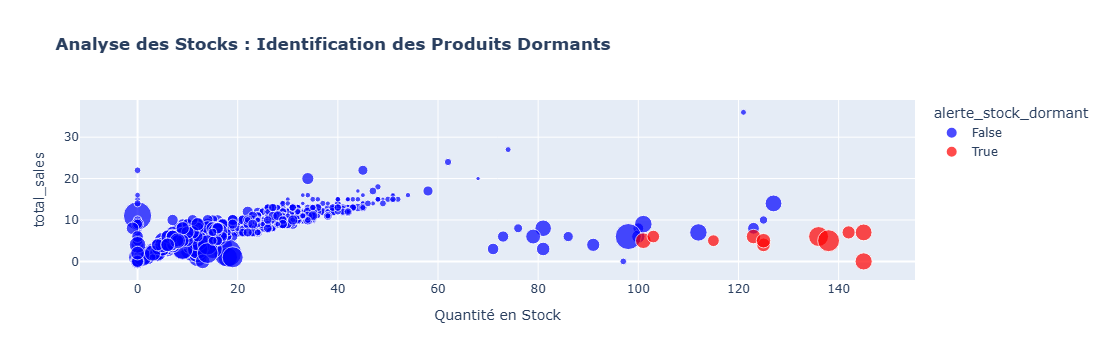

In [484]:
fig = px.scatter(
    erp_liaison_web,
    x='stock_quantity',
    y='total_sales', 
    color='alerte_stock_dormant', 
    size='price',
    hover_name='post_title', 
    title='<b>Analyse des Stocks : Identification des Produits Dormants</b>',
    labels={'stock_quantity': 'Quantité en Stock', 'duree_stock_mois': 'Durée du Stock (Mois)'},
    color_discrete_map={True: 'red', False: 'blue'} 
)

fig.update_layout(showlegend=True)
fig.show()

### Corrélations

In [488]:
variables_quantitatives = ['price', 'purchase_price', 'stock_quantity', 'total_sales', 'taux_de_marge']


matrice_correlation =  erp_liaison_web[variables_quantitatives].corr()
print(matrice_correlation)

                   price  purchase_price  stock_quantity  total_sales  \
price           1.000000        0.975958       -0.106674    -0.516258   
purchase_price  0.975958        1.000000       -0.024053    -0.503306   
stock_quantity -0.106674       -0.024053        1.000000     0.438901   
total_sales    -0.516258       -0.503306        0.438901     1.000000   
taux_de_marge   0.017758       -0.172237       -0.182882     0.069645   

                taux_de_marge  
price                0.017758  
purchase_price      -0.172237  
stock_quantity      -0.182882  
total_sales          0.069645  
taux_de_marge        1.000000  


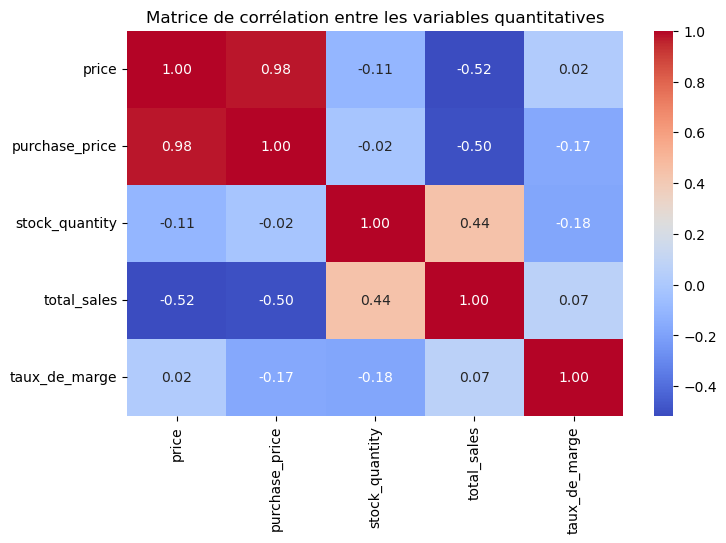

In [490]:
plt.figure(figsize=(8,5))
sns.heatmap(matrice_correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation entre les variables quantitatives")
plt.show()

### Analyse de la Matrice de Corrélation

La matrice de corrélation ci-dessus révèle les relations linéaires entre nos variables quantitatives clés. Les coefficients varient de -1 (corrélation négative parfaite) à +1 (corrélation positive parfaite), et 0 (absence de corrélation linéaire).

Voici les points saillants :

* **Prix d'Achat et Prix de Vente (price vs purchase_price) :** Une **très forte corrélation positive (≈ 0.98)**. Cela est tout à fait logique : les produits achetés à un prix élevé sont, en règle générale, revendus à un prix élevé, reflétant la structure de coûts et de marge de l'entreprise.

* **Prix et Ventes (price/purchase_price vs total_sales) :** Une **corrélation négative modérée (≈ -0.51 pour price, ≈ -0.50 pour purchase_price)**. Cela indique que plus un produit est cher (à l'achat ou à la vente), moins il tend à se vendre en grande quantité. Ce comportement est typique sur le marché des vins et spiritueux, où les articles haut de gamme ont souvent un volume de vente plus faible que les produits d'entrée ou de milieu de gamme.

* **Quantité en Stock et Ventes Totales (stock_quantity vs total_sales) :** Une **corrélation positive modérée (≈ 0.44)**. Cette relation suggère que les produits qui se vendent le plus (ou qui ont le potentiel de le faire) sont ceux pour lesquels l'entreprise maintient un niveau de stock plus élevé. Inversement, un stock faible pourrait être le reflet d'une faible demande ou d'une gestion plus "juste-à-temps" pour les articles moins populaires.

* **Taux de Marge et autres variables (taux_de_marge vs toutes les autres) :** Le **taux de marge présente de très faibles corrélations** avec le prix de vente, le prix d'achat, la quantité en stock ou les ventes totales (tous les coefficients sont proches de 0). Ceci est une observation importante : la rentabilité relative (en pourcentage) d'un produit ne semble pas directement liée à son prix absolu, à son coût d'achat, ou à son volume de vente. L'entreprise pourrait avoir des stratégies de marge variées qui ne suivent pas un modèle linéaire simple, ou bien d'autres facteurs (comme la notoriété de la marque, les promotions spécifiques, etc.) influencent davantage la marge.


| Corrélation                                     | Explication métier                                                |
| ----------------------------------------------- | ----------------------------------------------------------------- |
| `price` & `purchase_price` : **forte**          | Les produits chers à l’achat sont aussi chers à la vente          |
| `taux_de_marge` & autres : **faible**           | Le taux de marge n’est pas fortement lié au volume ou au prix     |
| `total_sales` & `marge_totale` : **forte**      | Logique : plus on vend, plus on génère de marge globale           |
| `price` & `marge_totale` : **moyenne à faible** | Un prix élevé n’implique pas nécessairement plus de marge globale |
